In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
import warnings
warnings.filterwarnings('always')

In [2]:
dataset =pd.read_csv(r"phishing.csv")

In [3]:
dataset.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
dataset.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
dataset.shape

(11054, 32)

In [6]:
dataset.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score

In [8]:
X= dataset.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [9]:
Y=dataset['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [10]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [11]:
print(train_X.shape)# Features for training  
print(test_X.shape) # to find accuracy 
print(train_Y.shape) 
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


In [12]:
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
logreg_predict= model_1.predict(test_X)
logreg_predict

array([ 1, -1, -1, ...,  1,  1, -1], dtype=int64)

In [15]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [16]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [17]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

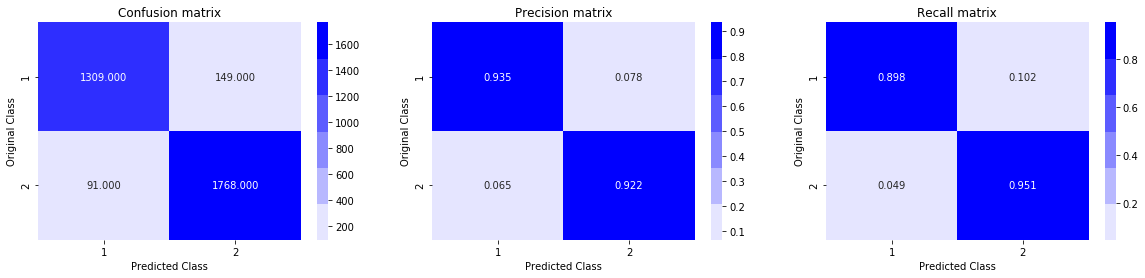

In [18]:
plot_confusion_matrix(test_Y, logreg_predict)

In [19]:
#2. KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [21]:
knn_predict=model_2.predict(test_X)

In [22]:
accuracy_score(knn_predict,test_Y)

0.6343081097377148

In [23]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.63      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.63      0.63      0.63      3317



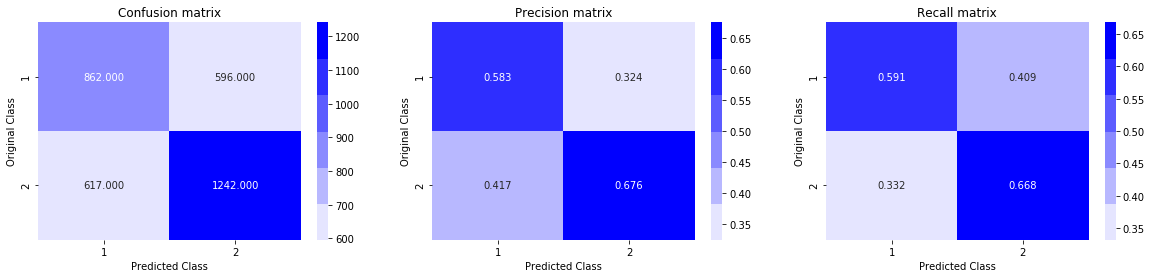

In [24]:
plot_confusion_matrix(test_Y, knn_predict)

In [25]:
#3. DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [27]:
decisiontree=DecisionTreeClassifier()
model_3=decisiontree.fit(train_X,train_Y)

In [28]:
decisiontree_predict=model_3.predict(test_X)

In [29]:
accuracy_score(decisiontree_predict,test_Y)

0.9448296653602652

In [30]:
print(classification_report(decisiontree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.95      0.94      1417
           1       0.96      0.94      0.95      1900

    accuracy                           0.94      3317
   macro avg       0.94      0.95      0.94      3317
weighted avg       0.95      0.94      0.94      3317



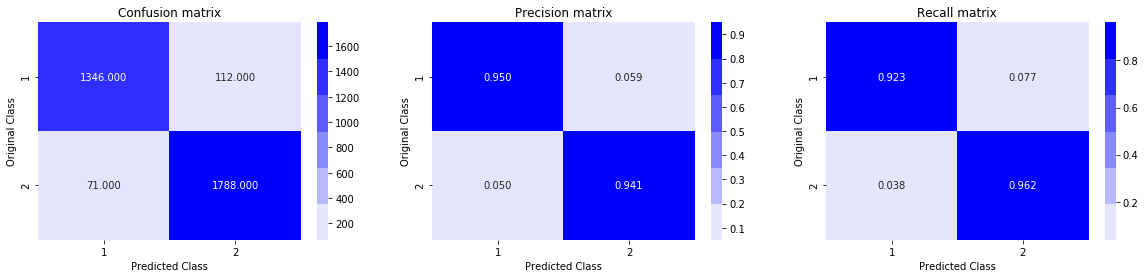

In [31]:
plot_confusion_matrix(test_Y, decisiontree_predict)

In [32]:
#4 .RandomForest 
from sklearn.ensemble import RandomForestClassifier

In [33]:
random=RandomForestClassifier()
model_4=random.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [34]:
random_predict=model_4.predict(test_X)

In [35]:
accuracy_score(random_predict,test_Y)

0.9728670485378353

In [36]:
print(classification_report(random_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1438
           1       0.98      0.97      0.98      1879

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



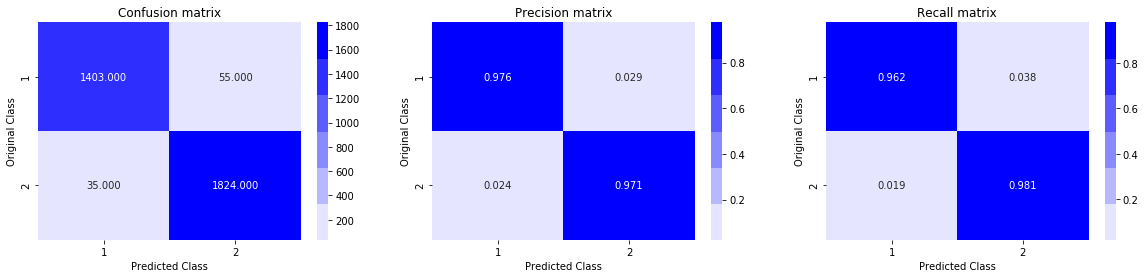

In [37]:
plot_confusion_matrix(test_Y, random_predict)

In [38]:
#5. Support Vector Machine 
from sklearn.svm import SVC

In [39]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
svm_predict=model_5.predict(test_X)

In [41]:
accuracy_score(svm_predict,test_Y)

0.5604461863129334

In [42]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



C:\Users\shanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\shanm\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


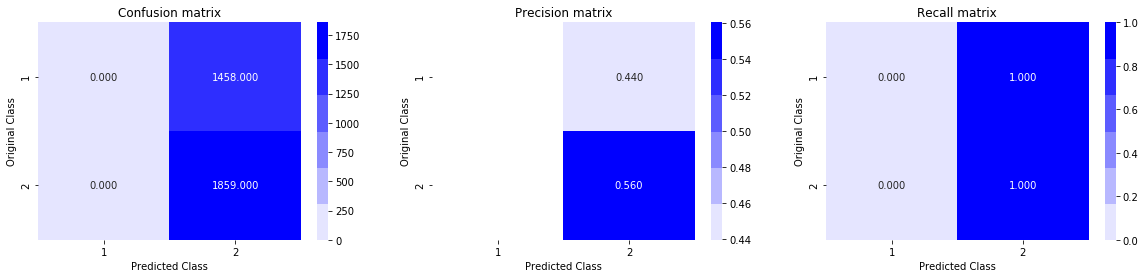

In [43]:
plot_confusion_matrix(test_Y, svm_predict)

In [44]:
#6.Gradient boosting Classifier
gbc=GradientBoostingClassifier()
model_6=gbc.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
gbc_predict=model_6.predict(test_X)
gbc_predict

array([ 1, -1, -1, ...,  1,  1, -1], dtype=int64)

In [46]:
accuracy_score(gbc_predict,test_Y)

0.9475429605064818

In [47]:
print(classification_report(gbc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      1410
           1       0.97      0.94      0.95      1907

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



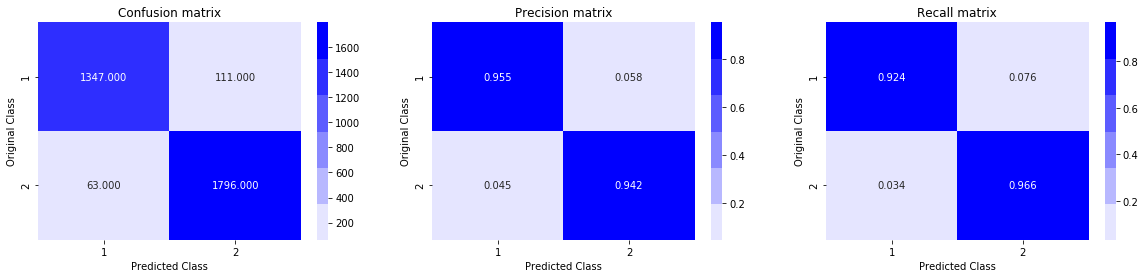

In [48]:
plot_confusion_matrix(test_Y, gbc_predict)

In [49]:
#7.Adaboost Classifier
abc=AdaBoostClassifier()
model_7=abc.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
abc_predict=model_7.predict(test_X)
abc_predict

array([ 1, -1, -1, ...,  1,  1, -1], dtype=int64)

In [51]:
accuracy_score(abc_predict,test_Y)

0.930057280675309

In [52]:
print(classification_report(abc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1392
           1       0.96      0.92      0.94      1925

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



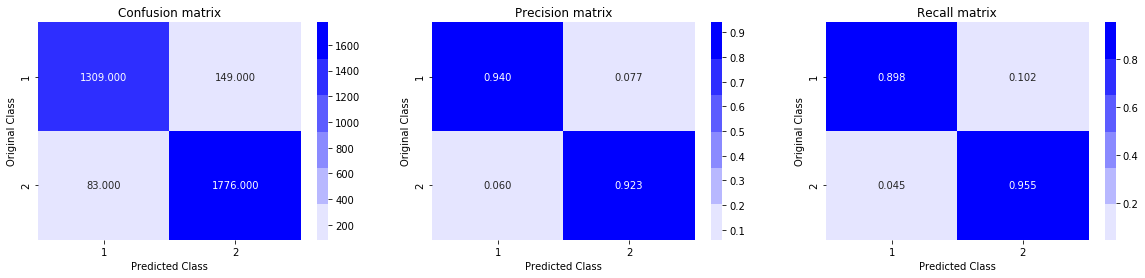

In [53]:
plot_confusion_matrix(test_Y, abc_predict)

In [54]:
#8. Naive Bayes
nbc = GaussianNB()

In [55]:
model_8=nbc.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
nbc_predict=model_8.predict(test_X)
nbc_predict

array([ 1, -1, -1, ...,  1,  1, -1], dtype=int64)

In [57]:
accuracy_score(nbc_predict,test_Y)

0.8878504672897196

In [58]:
print(classification_report(nbc_predict,test_Y))


              precision    recall  f1-score   support

          -1       0.94      0.83      0.88      1660
           1       0.85      0.95      0.89      1657

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



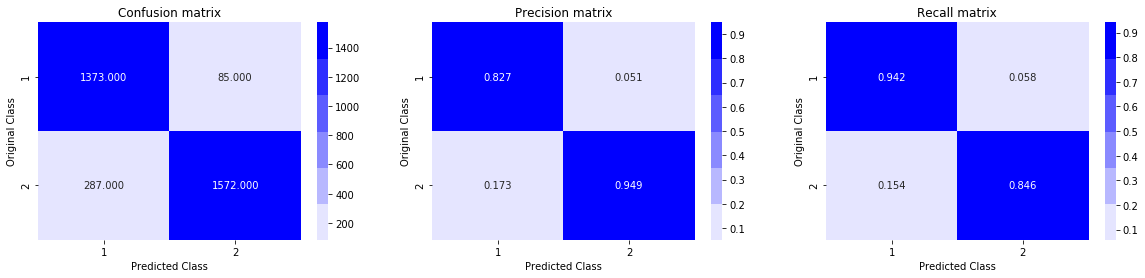

In [59]:
plot_confusion_matrix(test_Y, nbc_predict)

In [60]:
#9.Stocastic Gradient
sgdc = SGDClassifier()
model_9=sgdc.fit(train_X,train_Y)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
sgdc_predict=model_9.predict(test_X)
sgdc_predict


array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [62]:
accuracy_score(sgdc_predict,test_Y)


0.4498040397949955

In [63]:
print(classification_report(sgdc_predict,test_Y))

              precision    recall  f1-score   support

          -1       1.00      0.44      0.61      3281
           1       0.02      0.97      0.04        36

    accuracy                           0.45      3317
   macro avg       0.51      0.71      0.33      3317
weighted avg       0.99      0.45      0.61      3317



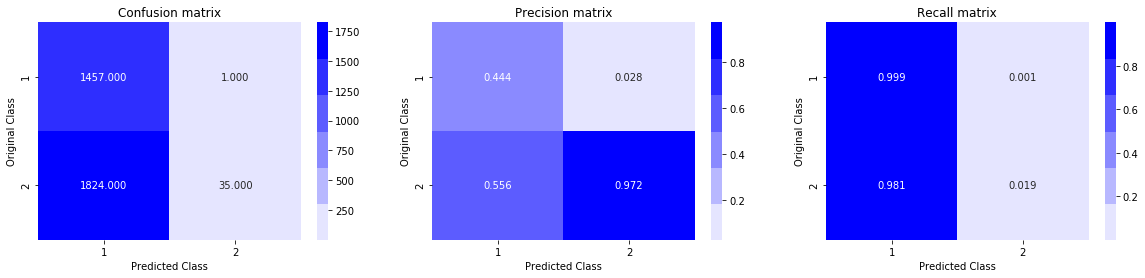

In [64]:
plot_confusion_matrix(test_Y, sgdc_predict)

In [65]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(decisiontree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(random_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Gradient Booster Classifier Accuracy:' , accuracy_score (gbc_predict, test_Y))
print('Ada Boost Classifier Accuracy:' , accuracy_score (abc_predict, test_Y))
print('Naive Bayes Classifier Accuracy:' , accuracy_score (nbc_predict, test_Y))
print('Stochastic Gradient Descent Classifier Accuracy:', accuracy_score (sgdc_predict, test_Y))

Logistic Regression Accuracy: 0.9276454627675611
K-Nearest Neighbour Accuracy: 0.6343081097377148
Decision Tree Classifier Accuracy: 0.9448296653602652
Random Forest Classifier Accuracy: 0.9728670485378353
support Vector Machine Accuracy: 0.5604461863129334
Gradient Booster Classifier Accuracy: 0.9475429605064818
Ada Boost Classifier Accuracy: 0.930057280675309
Naive Bayes Classifier Accuracy: 0.8878504672897196
Stochastic Gradient Descent Classifier Accuracy: 0.4498040397949955


In [66]:
# PREDICTION ON GIVEN INPUT USING RANDOM FOREST AS IT HAS THE HIGHEST ACCURACY
#1 represents it is phishing website and -1 represents it is not phishing website
index=input("Input number:")
ip=input("Ip:")
long=input("Long url:")
short=input("Short url:")
symbol=input("Symbol:")
redirect=input("Redirecting:")
fix=input("Prefix/Suffix:")
sub=input("Sub Domain:")
http=input("Https : ")
rl=input("Domain Reg len:")
fav=input("Favicon:")
port=input("Non Std Port:")
hturl=input("Https Domain Url:")
req=input("Request Url:")
acc=input("Anchor Url:")
links=input("Script tag links:")
server=input("Server Form Handler:")
info=input("Info Email:")
abnorm=input("Abnormal Url:")
forward=input("Website Forwarding:")
status=input("Status Bar Cust:")
right=input("Disable Right Click:")
pop=input("Using Pop up window?:")
ir=input("IFramed redirection:")
age=input("Age of domain:")
dns=input("DNS recording:")
traffic=input("Web Traffic:")
rank=input("Page Rank:")
gi=input("Google Index:")
point=input("Links pointing towards:")
stat=input("Stats Report:")
inp=[[int(index),int(ip),int(long),int(short),int(symbol),int(redirect),int(fix),int(sub),int(http),int(rl),int(fav),int(port),int(hturl),int(req),int(acc),int(links),int(server),int(info),int(abnorm),int(forward),int(status),int(right),int(pop),int(ir),int(age),int(dns),int(traffic),int(rank),int(gi),int(point),int(stat)]]
a=random.predict(inp)
print("Is it a phishing website:",a[0])


Input number:1
Ip:1
Long url:-1
Short url:1
Symbol:1
Redirecting:-1
Prefix/Suffix:1
Sub Domain:-1
Https : -1
Domain Reg len:1
Favicon:1
Non Std Port:1
Https Domain Url:1
Request Url:-1
Anchor Url:-1
Script tag links:-1
Server Form Handler:-1
Info Email:-1
Abnormal Url:0
Website Forwarding:1
Status Bar Cust:1
Disable Right Click:1
Using Pop up window?:1
IFramed redirection:-1
Age of domain:-1
DNS recording:-1
Web Traffic:-1
Page Rank:1
Google Index:0
Links pointing towards:-1
Stats Report:-1
Is it a phishing website: -1


In [67]:
#So it is not a phishing Website 